In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
import scipy.stats as stats;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import FunctionTransformer;
from sklearn.compose import ColumnTransformer;

In [27]:
df = pd.read_csv('train.csv' , usecols=['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df['Age'].fillna(df['Age'].mean() , inplace=True)

In [29]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [30]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [7]:
X = df.iloc[: , 1:3];
y = df.iloc[: , 0];

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=42);

<h1 style="color:orange; padding:14px">Analysing data</h1>

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_192\292826513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age']);


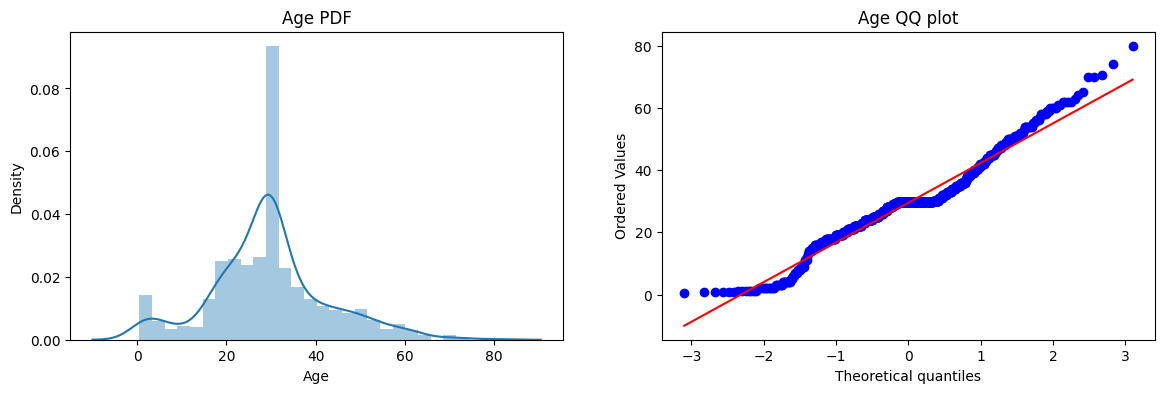

In [42]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train['Age']);
plt.title("Age PDF");

plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm" , plot=plt);
plt.title("Age QQ plot"); 




plt.show()



C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_192\3243833326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare']); plt.title("Fare PDF");


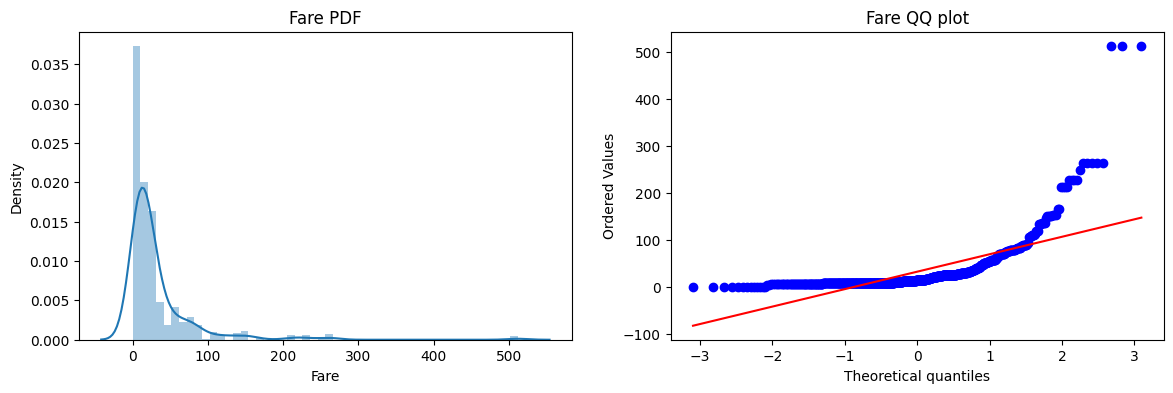

In [43]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train['Fare']); plt.title("Fare PDF");

plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm" , plot=plt);
plt.title("Fare QQ plot"); plt.show()

<h1 style="color:orange; padding:14px">Predicting without transforms</h1>

In [45]:
clf= LogisticRegression();
clf2 = DecisionTreeClassifier();

In [46]:
clf.fit(X_train , y_train);
clf2.fit(X_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
y_pred = clf.predict(X_test);
y_pred2 = clf2.predict(X_test)

print("Accuracy score of lr: " , accuracy_score(y_test , y_pred));
print("Accuracy score of dt: " , accuracy_score(y_test , y_pred2));

Accuracy score of lr:  0.7374301675977654
Accuracy score of dt:  0.5865921787709497


<h1 style="color:orange; padding:14px">Applying transforms</h1>

In [57]:
trf = FunctionTransformer(func=np.log1p)
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [72]:
X_train_transformed = trf.fit_transform(X_train['Fare'])
X_test_transformed = trf.transform(X_test['Fare']);
print(np.log1p(45.5), np.log1p(28.50))
X_train_transformed = pd.DataFrame(X_train_transformed , columns=['Fare'])
X_train_transformed = pd.concat([X_train['Age'] , X_train_transformed] , axis=1)
X_test_transformed = pd.DataFrame(X_test_transformed , columns=['Fare'])
X_test_transformed = pd.concat([X_test['Age'] , X_test_transformed] , axis=1)
X_train_transformed.head()

3.8394523125933104 3.3843902633457743


,Age,Fare
331,45.5,3.384390
733,23.0,2.639057
382,32.0,2.188856
704,26.0,2.180892
813,6.0,3.474293


C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_192\1811196625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age']); plt.title("Age PDF");


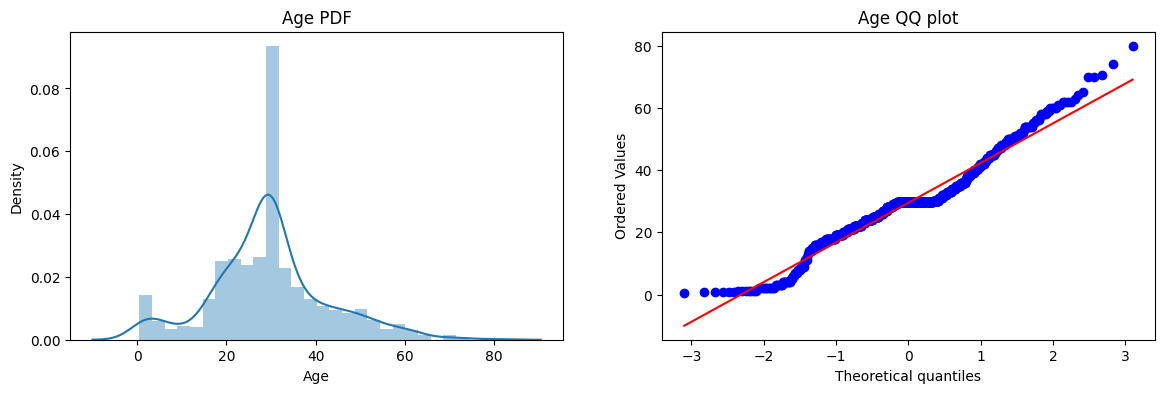

In [74]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train_transformed['Age']); plt.title("Age PDF");

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist="norm" , plot=plt);
plt.title("Age QQ plot"); plt.show()

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_192\554208728.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare']); plt.title("Fare PDF");


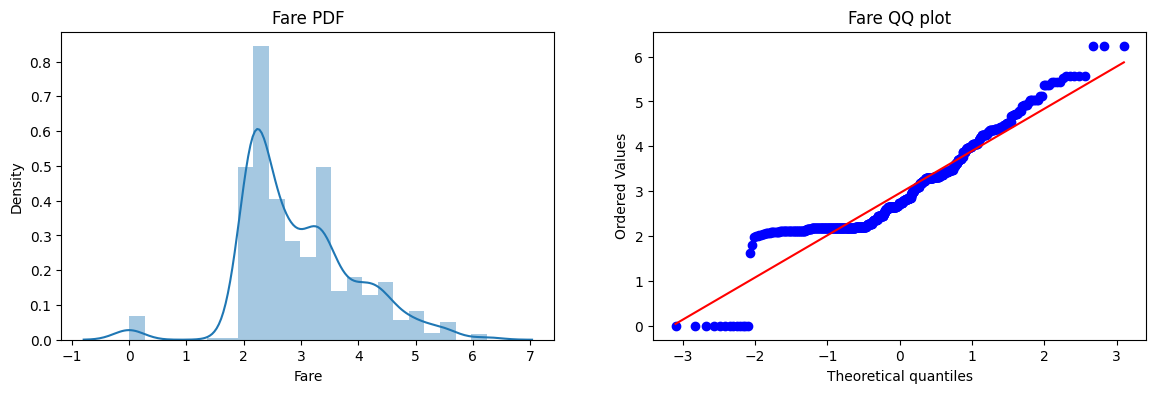

In [63]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train_transformed['Fare']); plt.title("Fare PDF");

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist="norm" , plot=plt);
plt.title("Fare QQ plot"); plt.show()

In [78]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [79]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6655680399500624


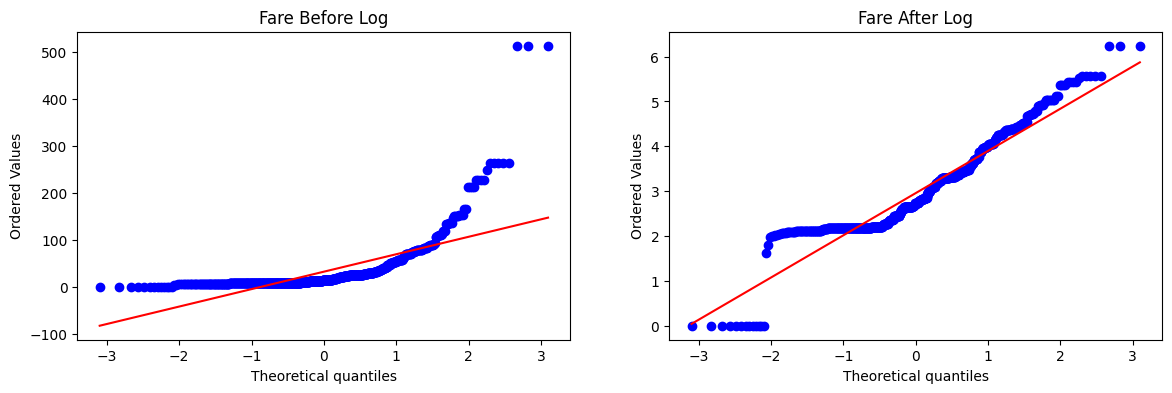

In [80]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

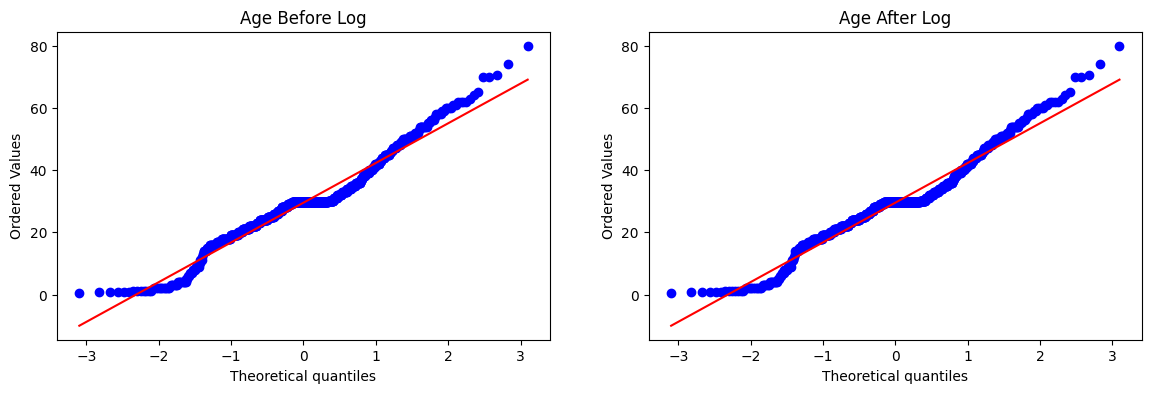

In [81]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

<h1 style="color:orange; padding:14px">applying log only on fare</h1>

In [82]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [83]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [84]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6622097378277154


In [85]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


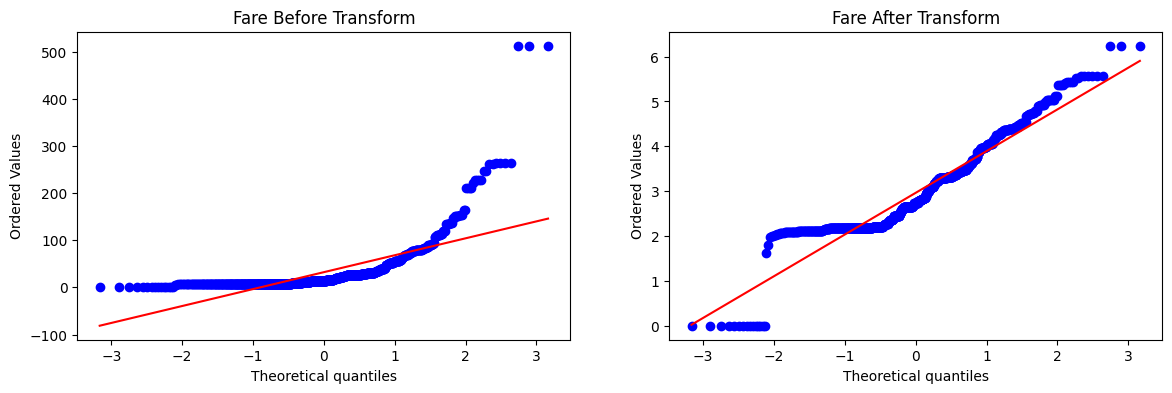

In [86]:
apply_transform(np.log1p)